<img src="https://www.mmu.edu.my/fci/wp-content/uploads/2021/01/FCI_wNEW_MMU_LOGO.png" style="height: 80px;" align=left>

## Assignment Objective ##

The aim of this assignment is to guide you through the process of understanding a dataset,
performing preprocessing, building classification models, including ensemble learning techniques,
and evaluation using cross-validation and various metrics.

## Importing Libraries

In [57]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


## Load the Dataset

In [58]:
# Step 1: Load the Dataset
data = pd.read_csv('Student_dataset (1).csv')

## Dataset Overview , Missing Values, Duplicate Rows

In [59]:
# Step 2: Data Exploration
print("1. Dataset Overview")
print("-------------------")
print(f"Shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")
print(f"\nMissing Values:\n{data.isnull().sum()}")
print(f"Duplicate Rows: {data.duplicated().sum()}")




1. Dataset Overview
-------------------
Shape: (4446, 37)
Columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 

In [60]:
# Check the structure of the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4446 non-null   int64  
 1   Application mode                                4444 non-null   float64
 2   Application order                               4446 non-null   int64  
 3   Course                                          4440 non-null   float64
 4   Daytime/evening attendance	                     4446 non-null   int64  
 5   Previous qualification                          4446 non-null   int64  
 6   Previous qualification (grade)                  4439 non-null   float64
 7   Nacionality                                     4446 non-null   int64  
 8   Mother's qualification                          4443 non-null   float64
 9   Father's qualification    

## Visualizing Distribution


3. Visualizing Distributions
-----------------------------


C:\Users\maniq\AppData\Local\Temp\ipykernel_17296\2408705712.py:24: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


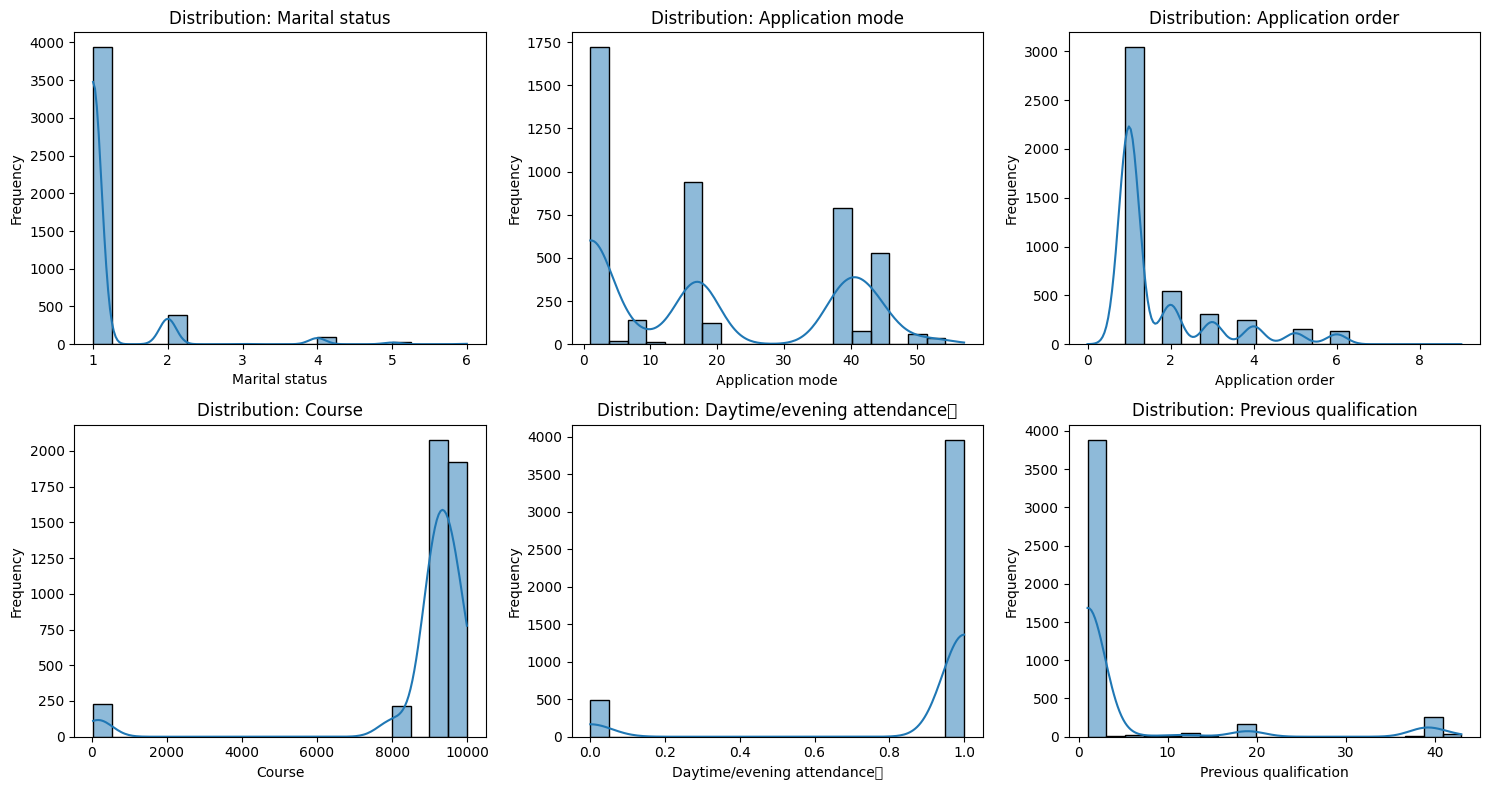

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load a sample dataset
# Replace this with your actual dataset
data = pd.read_csv('Student_dataset (1).csv')


# Identify numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

print("\n3. Visualizing Distributions")
print("-----------------------------")

plt.figure(figsize=(15, 8))  # Set the figure size
for i, col in enumerate(numerical_cols[:6], 1):  # Loop through the first 6 numerical columns
    plt.subplot(2, 3, i)  # Create a 2x3 grid of subplots
    sns.histplot(data[col], kde=True, bins=20)  # Plot the histogram with KDE
    plt.title(f'Distribution: {col}')  # Set the title
    plt.xlabel(col)  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


## Visualizing Target Variable


4. Target Variable Visualization
---------------------------------


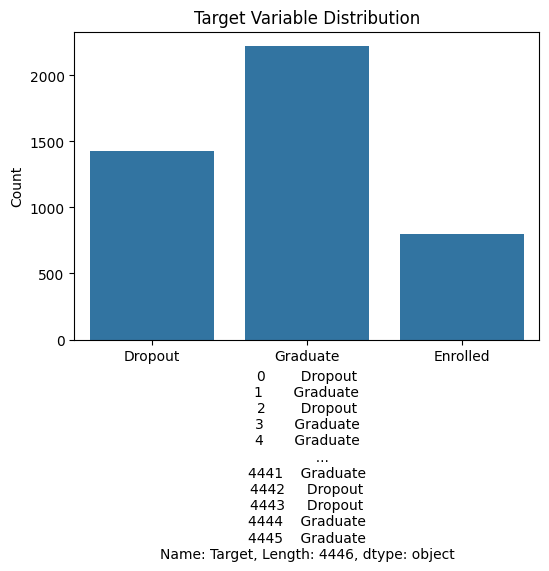

In [62]:
# Step 4: Visualizing the Target Variable

print("\n4. Target Variable Visualization")
print("---------------------------------")
target_col = data['Target']
plt.figure(figsize=(6, 4))  # Set the figure size
sns.countplot(data=data, x=target_col)  # Plot a countplot for the target variable
plt.title('Target Variable Distribution')  # Set the title
plt.xlabel(target_col)  # Label the x-axis with the target column name
plt.ylabel('Count')  # Label the y-axis with 'Count'
plt.show()  # Display the plot


## Data Cleaning

In [63]:
# Step 5: Data Preprocessing

print("\n5. Data Preprocessing")
print("---------------------")

# Handle Missing Values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Remove Duplicates
data = data.drop_duplicates()

# Normalize Numerical Features
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(f"\nMissing Values After Cleaning:")
print(data.isnull().sum())



5. Data Preprocessing
---------------------

Missing Values After Cleaning:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                 

In [64]:
import pandas as pd

# Load the dataset (replace 'raw_dataset.csv' with your file name)
data = pd.read_csv('Student_dataset (1).csv')

# Example cleaning: Drop rows with missing values
cleaned_data = data.dropna()

# Save the cleaned data
cleaned_data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned data saved to 'cleaned_dataset.csv'.")


Cleaned data saved to 'cleaned_dataset.csv'.


In [65]:
print(cleaned_data.shape)

(4399, 37)


In [66]:
print("\nSample Data:\n")
data.head()


Sample Data:



Marital status  Application mode  Application order  Course  \
0               1              17.0                  5   171.0   
1               1              15.0                  1  9254.0   
2               1               1.0                  5  9070.0   
3               1              17.0                  2  9773.0   
4               2              39.0                  1  8014.0   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                    19.0   
1                           160.0            1                     1.0   
2                           122.0            1                    37.0   
3                           122.0            1                    38.0   
4                           100.0            1                    37.0   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [67]:
data.select_dtypes(['int64', 'float64']).describe()

Marital status  Application mode  Application order       Course  \
count     4446.000000       4444.000000         4446.00000  4440.000000   
mean         1.179037         18.663816            1.72717  8858.807432   
std          0.606208         17.490937            1.31343  2060.398841   
min          1.000000          1.000000            0.00000    33.000000   
25%          1.000000          1.000000            1.00000  9085.000000   
50%          1.000000         17.000000            1.00000  9238.000000   
75%          1.000000         39.000000            2.00000  9556.000000   
max          6.000000         57.000000            9.00000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4446.000000             4446.000000   
mean                       0.891138                4.585245   
std                        0.311501               10.224512   
min                        0.000000                1.000000   
25%                        1.000000                1.000000   
50%                        1.000000                1.000000   
75%                        1.000000                1.000000   
max                        1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                     4439.000000  4446.000000             4443.000000   
mean                       132.640572     1.896986               19.552104   
std                         13.221879     7.075343               15.610384   
min                         95.000000     1.000000                1.000000   
25%                        125.000000     1.000000                2.000000   
50%                        133.100000     1.000000               19.000000   
75%                        140.000000     1.000000               37.000000   
max                        190.000000   109.000000               44.000000   

       Father's qualification  ...  \
count             4446.000000  ...   
mean                22.284300  ...   
std                 15.345329  ...   
min                  1.000000  ...   
25%                  3.000000  ...   
50%                 19.000000  ...   
75%                 37.000000  ...   
max                 44.000000  ...   

       Curricular units 1st sem (without evaluations)  \
count                                     4446.000000   
mean                                         0.137427   
std                                          0.689473   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          4446.000000   
mean                              0.543860   
std                               1.921926   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4446.000000   
mean                              6.234818   
std                               2.194935   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4446.000000   
mean                                 8.065902   
std                                  3.941864   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                           

In [68]:
data.select_dtypes(['object']).describe()

Target
count       4446
unique         3
top     Graduate
freq        2221

C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


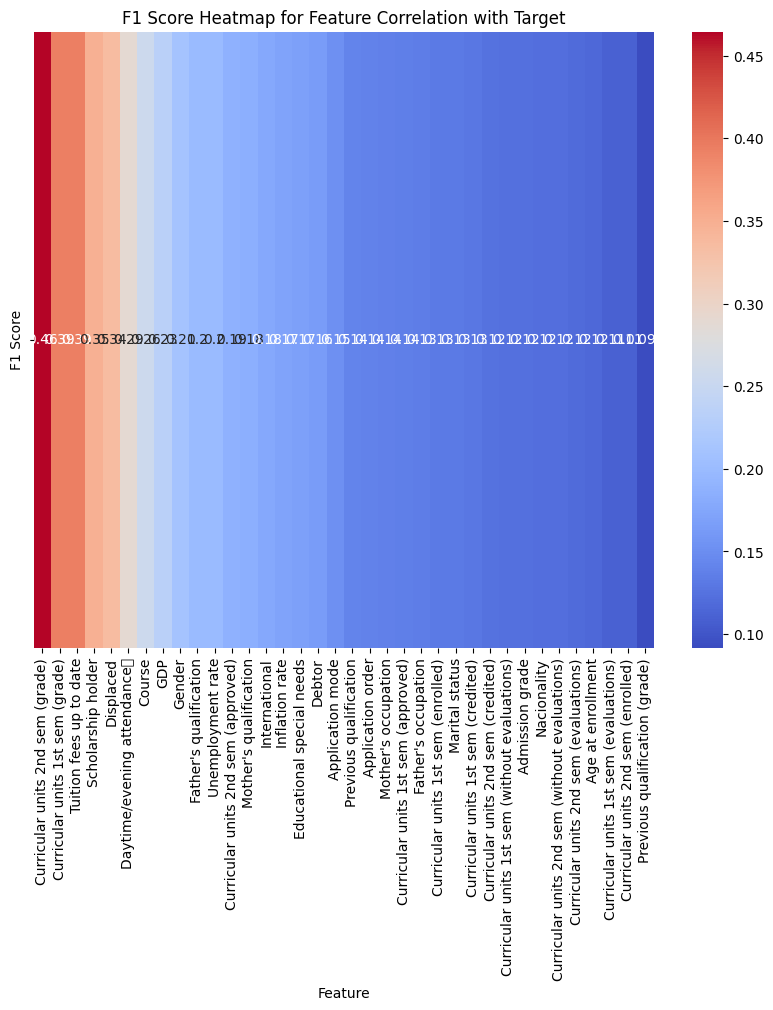

The feature with the best correlation to the target is: Curricular units 2nd sem (grade) with F1 Score: 0.46451269413330193


In [69]:
# Importing required libraries
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.metrics import f1_score
import numpy as np

# Step 1: Encode categorical features and target
def encode_data(data, target_column):
    encoder = LabelEncoder()
    encoded_data = data.copy()
    for col in encoded_data.select_dtypes(include=['object']).columns:
        encoded_data[col] = encoder.fit_transform(encoded_data[col])
    encoded_data[target_column] = encoder.fit_transform(encoded_data[target_column])
    return encoded_data

encoded_data = encode_data(cleaned_data, 'Target')  # Replace 'Target' with your actual target column

# Step 2: Discretize numerical features
def discretize_features(data, numerical_cols, n_bins=4):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    discretized_data = data.copy()
    discretized_data[numerical_cols] = discretizer.fit_transform(discretized_data[numerical_cols])
    return discretized_data

numerical_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns
discretized_data = discretize_features(encoded_data, numerical_cols)

# Step 3: Compute F1 Scores for all features with respect to the target
def compute_f1_scores(data, target_column):
    target = data[target_column]
    f1_scores = {}
    for col in data.columns:
        if col != target_column:
            f1 = f1_score(target, data[col], average='macro')  # Use macro for multiclass targets
            f1_scores[col] = f1
    return f1_scores

f1_scores = compute_f1_scores(discretized_data, 'Target')

# Step 4: Convert F1 Scores to a DataFrame for visualization
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Feature', 'F1 Score'])
f1_df = f1_df.sort_values(by='F1 Score', ascending=False)

# Step 5: Visualize the F1 Scores as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(f1_df.set_index('Feature').T, cmap='coolwarm', annot=True)
plt.title('F1 Score Heatmap for Feature Correlation with Target')
plt.show()

# Step 6: Select the best correlation feature
best_feature = f1_df.iloc[0]
print(f"The feature with the best correlation to the target is: {best_feature['Feature']} with F1 Score: {best_feature['F1 Score']}")


In [70]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix




Correlation Matrix:


Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264768   
Application order                                    -0.126252   
Course                                                0.046662   
Daytime/evening attendance\t                         -0.274427   
Previous qualification                                0.063742   
Previous qualification (grade)                       -0.023435   
Nacionality                                          -0.009861   
Mother's qualification                                0.193885   
Father's qualification                                0.130684   
Mother's occupation                                   0.034748   
Father's occupation                                   0.031306   
Admission grade                                      -0.005356   
Displaced                                            -0.235950   
Educational special needs                            -0.028334   
Debtor                                                0.035524   
Tuition fees up to date                              -0.090316   
Gender                                               -0.014820   
Scholarship holder                                   -0.054894   
Age at enrollment                                     0.524938   
International                                        -0.028539   
Curricular units 1st sem (credited)                   0.059927   
Curricular units 1st sem (enrolled)                   0.051672   
Curricular units 1st sem (evaluations)                0.059362   
Curricular units 1st sem (approved)                  -0.032256   
Curricular units 1st sem (grade)                     -0.059445   
Curricular units 1st sem (without evaluations)        0.034238   
Curricular units 2nd sem (credited)                   0.061421   
Curricular units 2nd sem (enrolled)                   0.038564   
Curricular units 2nd sem (evaluations)                0.023682   
Curricular units 2nd sem (approved)                  -0.044325   
Curricular units 2nd sem (grade)                     -0.071273   
Curricular units 2nd sem (without evaluations)        0.020022   
Unemployment rate                                    -0.019977   
Inflation rate                                        0.008251   
GDP                                                  -0.025820   

                                                Application mode  \
Marital status                                          0.264768   
Application mode                                        1.000000   
Application order                                      -0.286193   
Course                                                  0.062827   
Daytime/evening attendance\t                           -0.304050   
Previous qualification                                  0.423137   
Previous qualification (grade)                         -0.041317   
Nacionality                                            -0.004277   
Mother's qualification                                  0.121245   
Father's qualification                                  0.084427   
Mother's occupation                                     0.051567   
Father's occupation                                     0.036665   
Admission grade                                        -0.014287   
Displaced                                              -0.302159   
Educational special needs                              -0.030666   
Debtor                                                  0.122694   
Tuition fees up to date                                -0.135701   
Gender                                                  0.160239   
Scholarship holder                                     -0.163841   
Age at enrollment                                       0.515810   
International                                           0.001285   
Curricular units 1st sem (credited)                     0.249122   
Curricular units 1st sem (enrolled)      

C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\maniq\anaconda3\envs\CDS6314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


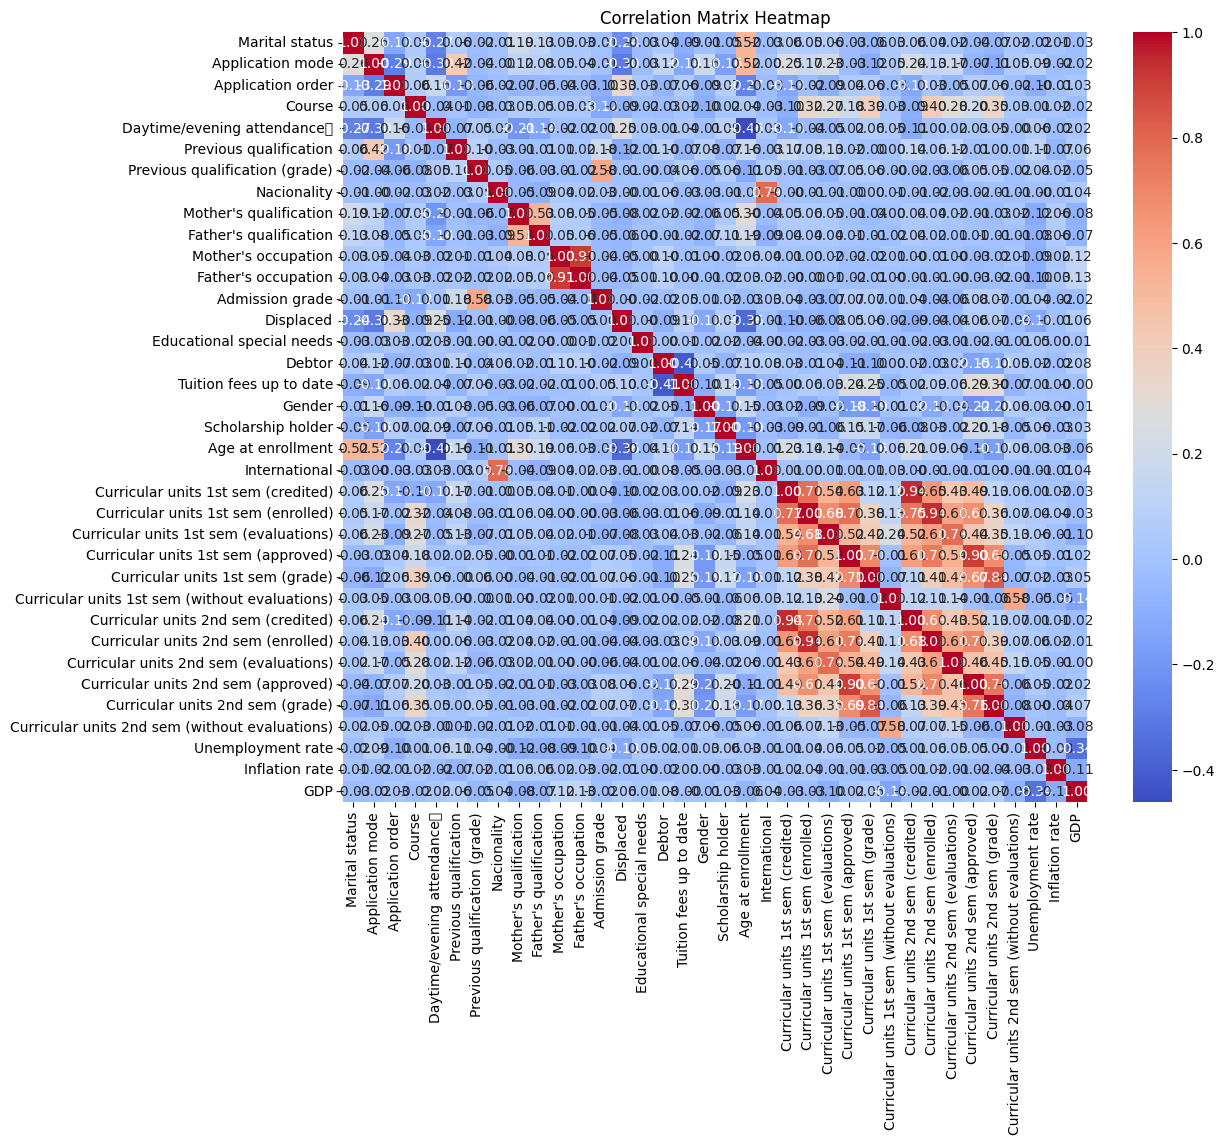

In [71]:
# Load your dataset
data = pd.read_csv('Student_dataset (1).csv')

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')  # Add a title to the heatmap
plt.show()  # Display the heatmap


In [72]:
# Flatten the correlation matrix and extract correlation pairs (excluding self-correlation)
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Sort by absolute correlation value
top_5_correlations = correlation_pairs.abs().sort_values(ascending=False).head(10).reset_index()
top_5_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the top 5 correlations
print("Top 5 Feature Pairs with Highest Correlation:")
top_5_correlations


Top 5 Feature Pairs with Highest Correlation:


Feature 1                            Feature 2  \
0  Curricular units 2nd sem (credited)  Curricular units 1st sem (credited)   
1  Curricular units 1st sem (credited)  Curricular units 2nd sem (credited)   
2  Curricular units 1st sem (enrolled)  Curricular units 2nd sem (enrolled)   
3  Curricular units 2nd sem (enrolled)  Curricular units 1st sem (enrolled)   
4                  Father's occupation                  Mother's occupation   
5                  Mother's occupation                  Father's occupation   
6  Curricular units 2nd sem (approved)  Curricular units 1st sem (approved)   
7  Curricular units 1st sem (approved)  Curricular units 2nd sem (approved)   
8     Curricular units 1st sem (grade)     Curricular units 2nd sem (grade)   
9     Curricular units 2nd sem (grade)     Curricular units 1st sem (grade)   

   Correlation  
0     0.944527  
1     0.944527  
2     0.942590  
3     0.942590  
4     0.910450  
5     0.910450  
6     0.903340  
7     0.903340  
8     0.837285  
9     0.837285

Top 10 Correlations:


C:\Users\maniq\AppData\Local\Temp\ipykernel_17296\1056832115.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


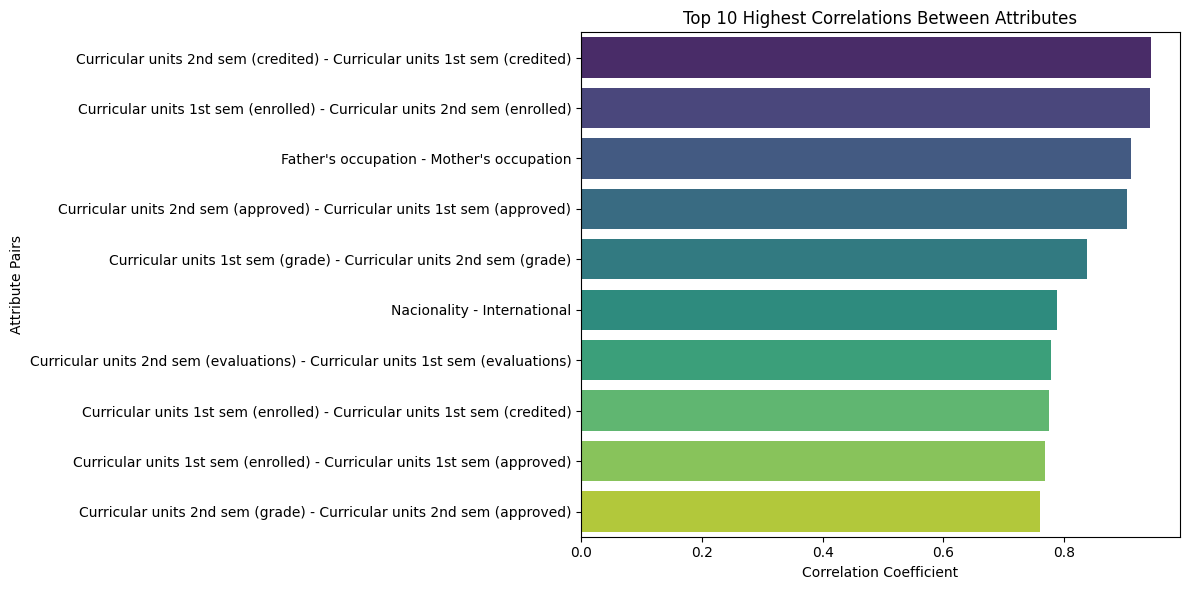

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('Student_dataset (1).csv')

# Compute the correlation matrix
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Flatten the correlation matrix
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Attribute 1', 'Attribute 2', 'Correlation']

# Remove self-correlations (where Attribute 1 equals Attribute 2)
correlation_pairs = correlation_pairs[correlation_pairs['Attribute 1'] != correlation_pairs['Attribute 2']]

# Sort by absolute correlation values
correlation_pairs['AbsCorrelation'] = correlation_pairs['Correlation'].abs()
correlation_pairs = correlation_pairs.sort_values(by='AbsCorrelation', ascending=False)

# Drop duplicate pairs (e.g., "A-B" and "B-A")
correlation_pairs['SortedAttributes'] = correlation_pairs.apply(
    lambda x: tuple(sorted([x['Attribute 1'], x['Attribute 2']])), axis=1
)
top_10_unique_corr = correlation_pairs.drop_duplicates(subset='SortedAttributes').head(10)

# Drop helper columns used for sorting
top_10_unique_corr = top_10_unique_corr.drop(columns=['AbsCorrelation', 'SortedAttributes'])

# Display the result
print("Top 10 Correlations:")

# Plot the Top 10 Correlations
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_unique_corr['Correlation'], 
    y=top_10_unique_corr.apply(lambda x: f"{x['Attribute 1']} - {x['Attribute 2']}", axis=1),
    palette="viridis"
)
plt.title("Top 10 Highest Correlations Between Attributes")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Attribute Pairs")
plt.tight_layout()
plt.show()


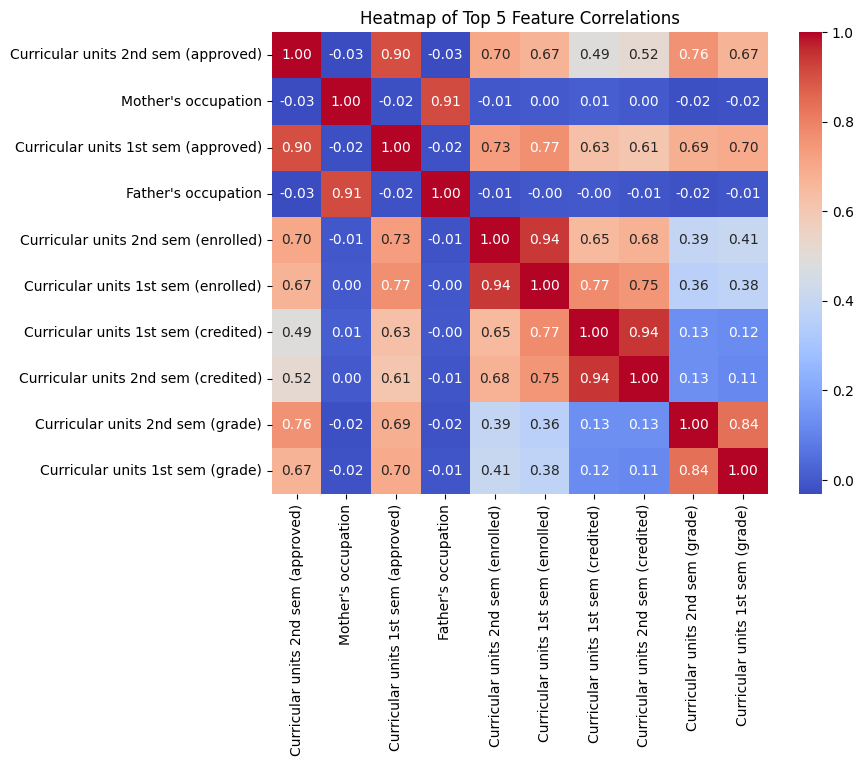

In [74]:
# Extract the unique features from the top 5 correlations
top_5_features = set(top_5_correlations['Feature 1']).union(set(top_5_correlations['Feature 2']))

# Create a smaller correlation matrix for the selected features
top_5_correlation_matrix = correlation_matrix.loc[list(top_5_features), list(top_5_features)]

# Generate a heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(top_5_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Top 5 Feature Correlations')  # Add a title
plt.show()  # Display the heatmap


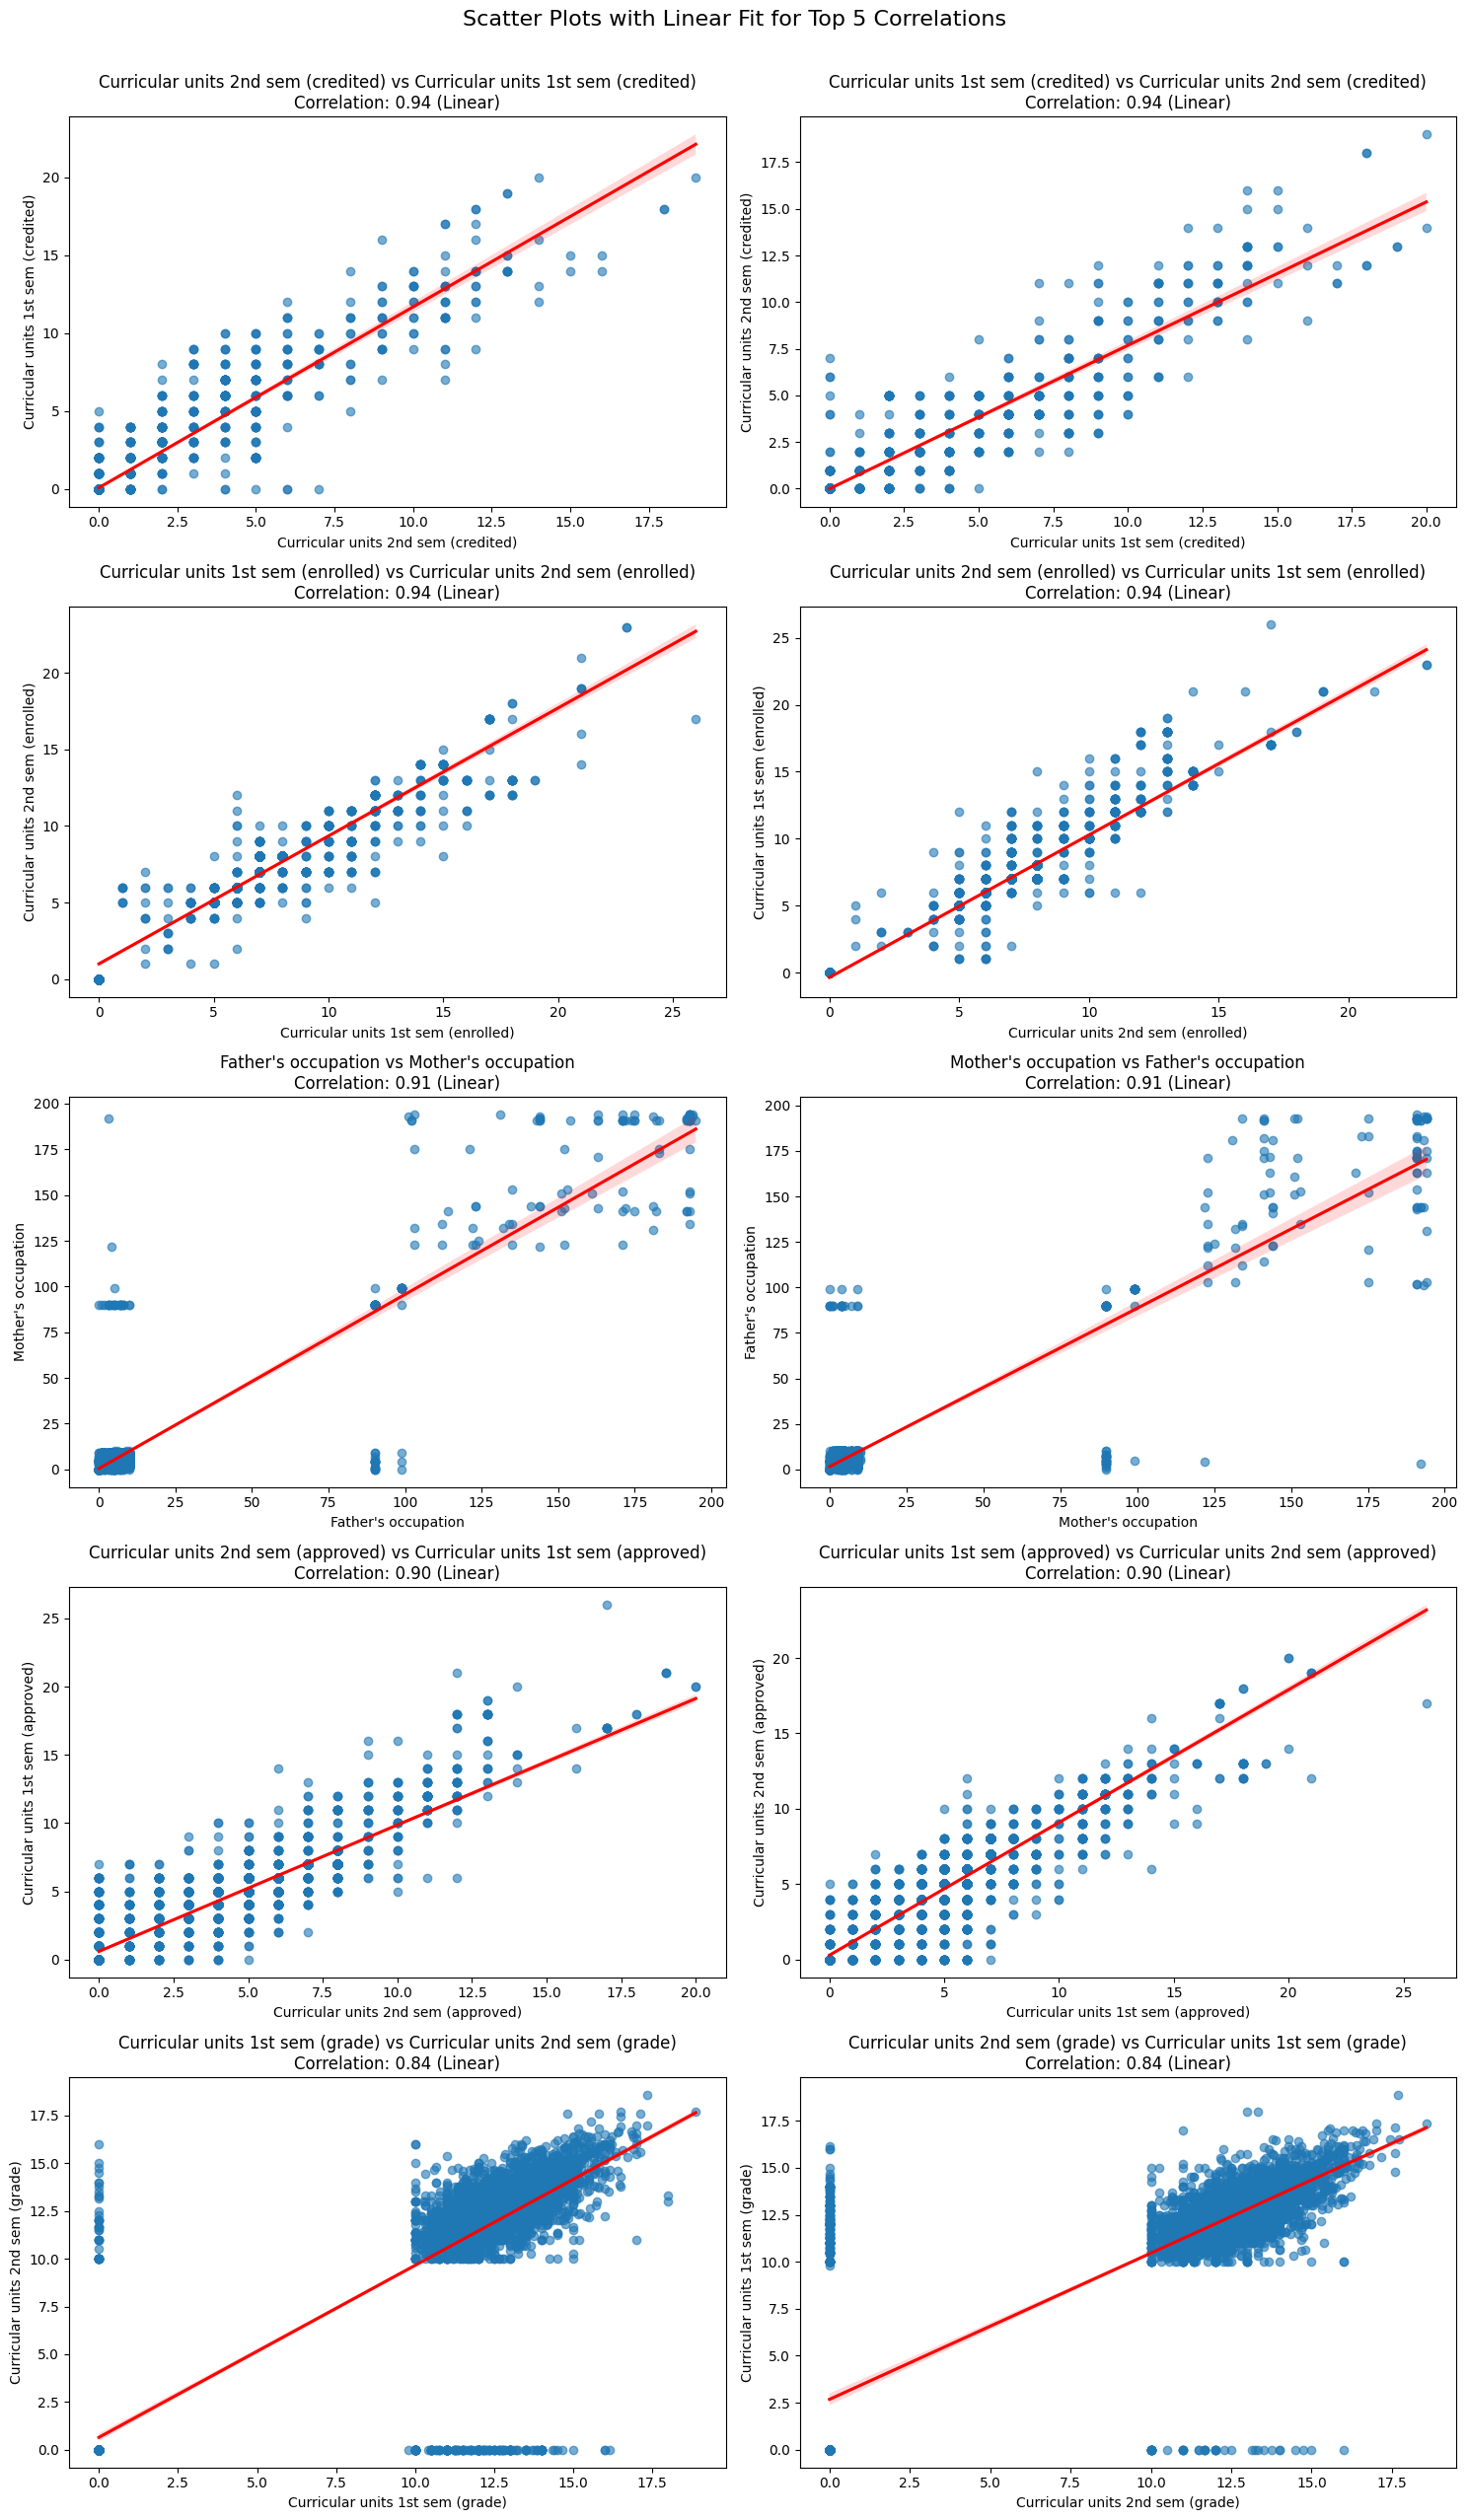

In [75]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plots for the top 5 correlations with linear fit and linearity check
num_plots = len(top_5_correlations)  # Number of correlations to plot
rows = (num_plots + 1) // 2  # Calculate rows needed for 2 columns

plt.figure(figsize=(15, rows * 5))  # Dynamically adjust the figure size

for i, row in enumerate(top_5_correlations.itertuples(), 1):
    feature1 = row._1  # Feature 1
    feature2 = row._2  # Feature 2

    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(data[feature1], data[feature2])
    linearity = "Linear" if abs(correlation) > 0.7 else "Non-linear"

    # Create a subplot
    plt.subplot(rows, 2, i)
    sns.regplot(x=data[feature1], y=data[feature2], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6})
    plt.title(f'{feature1} vs {feature2}\nCorrelation: {correlation:.2f} ({linearity})')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.suptitle('Scatter Plots with Linear Fit for Top 5 Correlations', y=1.02, fontsize=16)
plt.show()


## splitting data


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'Student_dataset (1).csv'
df2 = pd.read_csv(file_path)

# Define features and target
X = df2.drop('Target', axis=1)
y = df2['Target']

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean or another strategy
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 6: Display the shapes of the splits
print("\nData Splitting Information:")
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")


# Save the balanced dataset (optional)
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['Target'])], axis=1)
balanced_data.to_csv('Student_dataset_balanced.csv', index=False)
print("Balanced data saved to 'Student_dataset_balanced.csv'.")



Data Splitting Information:
X_train Shape: (4664, 36)
X_test Shape: (1999, 36)
y_train Shape: (4664,)
y_test Shape: (1999,)
Balanced data saved to 'Student_dataset_balanced.csv'.


## logistic regression

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Step 1: Standardize the Features
scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_scaled, y_balanced, test_size=0.3, random_state=42)

# Step 3: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 4: Initialize Logistic Regression Model with GridSearchCV for Hyperparameter Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag'],
    'penalty': ['l2']  # Use 'l1' with 'saga' if needed
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the Best Model
best_model = grid_search.best_estimator_

# Step 5: Fit the Best Model on the Training Data
best_model.fit(X_train, y_train)

# Step 6: Make Predictions on the Test Data
y_pred = best_model.predict(X_test)

# Step 7: Evaluate the Model
print("Best Hyperparameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}

Confusion Matrix:
[[488 123  47]
 [ 77 437 155]
 [ 15 107 550]]

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.74      0.79       658
    Enrolled       0.66      0.65      0.65       669
    Graduate       0.73      0.82      0.77       672

    accuracy                           0.74      1999
   macro avg       0.74      0.74      0.74      1999
weighted avg       0.74      0.74      0.74      1999


Accuracy Score:
0.7378689344672336


Balanced data saved to Student_dataset_balanced.csv


C:\Users\maniq\AppData\Local\Temp\ipykernel_17296\1015290565.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_data, x='Target', palette='viridis')


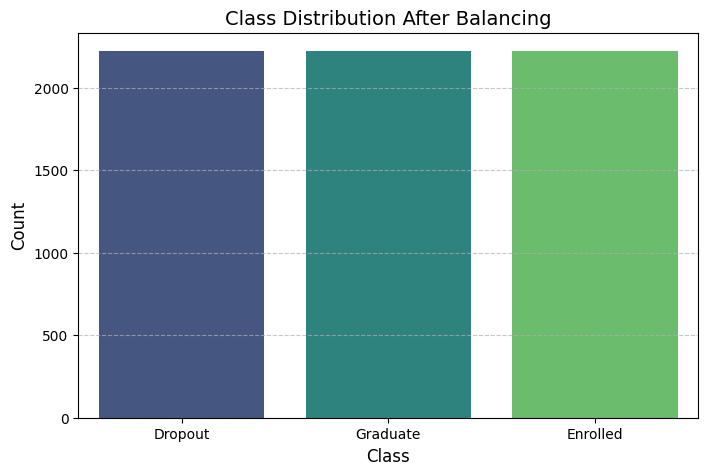

In [79]:
import pandas as pd
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
# Assuming 'data' is already loaded and contains the 'Target' column
X = data.drop('Target', axis=1)
y = data['Target']

# Step 2: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' as needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 3: Apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Step 4: Create a balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.DataFrame(y_balanced, columns=['Target'])], axis=1)

# Step 5: Save balanced data to a CSV file
balanced_output_path = 'Student_dataset_balanced.csv'
balanced_data.to_csv(balanced_output_path, index=False)
print(f"Balanced data saved to {balanced_output_path}")

# Step 6: Plot class distribution after balancing
plt.figure(figsize=(8, 5))
sns.countplot(data=balanced_data, x='Target', palette='viridis')
plt.title('Class Distribution After Balancing', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
